In [85]:
import pandas as pd
df=pd.read_csv(r"../Datasets/ClimateTest.csv")


In [86]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [87]:
df.loc[0,"date"].day_name()
# so it is not in DateTime format. 

AttributeError: 'str' object has no attribute 'day_name'

In [ ]:
#converted into Datetime
# Convert to datetime: Start by converting your date/time column into pandas datetime objects using pd.to_datetime(). This unlocks powerful date/time manipulations.
df["date"]=pd.to_datetime(df["date"], format='%Y-%m-%d')
df["date"]

0     2017-01-01
1     2017-01-02
2     2017-01-03
3     2017-01-04
4     2017-01-05
         ...    
109   2017-04-20
110   2017-04-21
111   2017-04-22
112   2017-04-23
113   2017-04-24
Name: date, Length: 114, dtype: datetime64[ns]

In [ ]:
df.loc[0,"date"].day_name()

'Sunday'

In [ ]:
# we can get day of the week for each of the dates in this series. 
df["date"].dt.day_name()

0         Sunday
1         Monday
2        Tuesday
3      Wednesday
4       Thursday
         ...    
109     Thursday
110       Friday
111     Saturday
112       Sunday
113       Monday
Name: date, Length: 114, dtype: object

In [ ]:
# assigining new column
df["day"]=df["date"].dt.day_name()
df

,date,meantemp,humidity,wind_speed,meanpressure,day
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,Sunday
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,Monday
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,Tuesday
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,Wednesday
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,Thursday
...,...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000,Thursday
110,2017-04-21,34.250000,39.375000,6.962500,999.875000,Friday
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000,Saturday
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000,Sunday


In [ ]:
# Earliest Date in this dataFrame. 
df["date"].min()

Timestamp('2017-01-01 00:00:00')

In [ ]:
df["date"].max()

Timestamp('2017-04-24 00:00:00')

In [ ]:
df["date"].max()-df["date"].min()
# so we have 113 days in this entire data. 

Timedelta('113 days 00:00:00')

In [ ]:
# Datetime components extraction: Use the .dt accessor to extract parts of the datetime like year, month, day, hour, and minute which are often necessary for analysis.
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df

,date,meantemp,humidity,wind_speed,meanpressure,year,month,day
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,2017,1,1
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,2017,1,2
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,2017,1,3
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,2017,1,4
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,2017,1,5
...,...,...,...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000,2017,4,20
110,2017-04-21,34.250000,39.375000,6.962500,999.875000,2017,4,21
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000,2017,4,22
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000,2017,4,23


In [ ]:
# create filters using datetime
df["year"].nunique()

1

In [ ]:
filter=(df["date"]>="2016") & (df["date"]<"2018")
df.loc[filter]
#since we only have data of 2017 so we got everything as result. 

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [ ]:
filter=(df["date"]>=pd.to_datetime('2017-04-21'))
df.loc[filter]


,date,meantemp,humidity,wind_speed,meanpressure,year,month,day
110,2017-04-21,34.250,39.375000,6.962500,999.875000,2017,4,21
111,2017-04-22,32.900,40.900000,8.890000,1001.600000,2017,4,22
112,2017-04-23,32.875,27.500000,9.962500,1002.125000,2017,4,23
113,2017-04-24,32.000,27.142857,12.157143,1004.142857,2017,4,24


In [ ]:
# setting date as index
df.set_index("date", inplace=True)
df

,meantemp,humidity,wind_speed,meanpressure,year,month,day
date,,,,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000,2017,1,1
2017-01-02,18.500000,77.222222,2.894444,1018.277778,2017,1,2
2017-01-03,17.111111,81.888889,4.016667,1018.333333,2017,1,3
2017-01-04,18.700000,70.050000,4.545000,1015.700000,2017,1,4
2017-01-05,18.388889,74.944444,3.300000,1014.333333,2017,1,5
...,...,...,...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000,2017,4,20
2017-04-21,34.250000,39.375000,6.962500,999.875000,2017,4,21
2017-04-22,32.900000,40.900000,8.890000,1001.600000,2017,4,22


In [ ]:
df["2017-02":"2017-04"]

,meantemp,humidity,wind_speed,meanpressure,year,month,day
date,,,,,,,
2017-02-01,15.250000,78.625000,5.100000,1017.500000,2017,2,1
2017-02-02,17.090909,66.545455,3.027273,1018.909091,2017,2,2
2017-02-03,15.636364,78.181818,1.854545,1017.727273,2017,2,3
2017-02-04,18.700000,77.600000,9.820000,1014.400000,2017,2,4
2017-02-05,18.631579,77.631579,8.100000,1014.210526,2017,2,5
...,...,...,...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000,2017,4,20
2017-04-21,34.250000,39.375000,6.962500,999.875000,2017,4,21
2017-04-22,32.900000,40.900000,8.890000,1001.600000,2017,4,22


In [ ]:
df["2017-03":"2017-04"]["wind_speed"].mean()

np.float64(8.99088468602105)

In [91]:
import pandas as pd
air_quality= pd.read_csv(r"..\Datasets/air_quality_no2_long.csv" , quoting=3)  # quoting=3 means QUOTE_NONE
air_quality.head()
air_quality=air_quality.rename(columns={"date.utc":"datetime"})
air_quality.head()
air_quality["datetime"]=pd.to_datetime(air_quality["datetime"])
air_quality["datetime"]
air_quality = air_quality.set_index("datetime")
air_quality = air_quality.sort_index()
subset = air_quality["2019-05":"2019-06"]
subset


,city,country,location,parameter,value,unit
datetime,,,,,,
2019-05-07 01:00:00+00:00,London,GB,London Westminster,no2,23.0,µg/m³
2019-05-07 01:00:00+00:00,Antwerpen,BE,BETR801,no2,50.5,µg/m³
2019-05-07 01:00:00+00:00,Paris,FR,FR04014,no2,25.0,µg/m³
2019-05-07 02:00:00+00:00,Paris,FR,FR04014,no2,27.7,µg/m³
2019-05-07 02:00:00+00:00,London,GB,London Westminster,no2,19.0,µg/m³
...,...,...,...,...,...,...
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³


In [98]:
air_quality.loc["2019-05-07"]["value"].mean()

np.float64(29.200000000000006)

In [ ]:
# to check maximum value of the day
subset = air_quality.loc["2019-05-07"]
london_data = subset[subset["city"] == "London"]
london_data.max()

city                     London
country                      GB
location     London Westminster
parameter                   no2
value                      32.0
unit                      µg/m³
dtype: object

In [105]:
highs=air_quality["city"].resample('D').max()
highs

datetime
2019-05-07 00:00:00+00:00    Paris
2019-05-08 00:00:00+00:00    Paris
2019-05-09 00:00:00+00:00    Paris
2019-05-10 00:00:00+00:00    Paris
2019-05-11 00:00:00+00:00    Paris
2019-05-12 00:00:00+00:00    Paris
2019-05-13 00:00:00+00:00    Paris
2019-05-14 00:00:00+00:00    Paris
2019-05-15 00:00:00+00:00    Paris
2019-05-16 00:00:00+00:00    Paris
2019-05-17 00:00:00+00:00    Paris
2019-05-18 00:00:00+00:00    Paris
2019-05-19 00:00:00+00:00    Paris
2019-05-20 00:00:00+00:00    Paris
2019-05-21 00:00:00+00:00    Paris
2019-05-22 00:00:00+00:00    Paris
2019-05-23 00:00:00+00:00    Paris
2019-05-24 00:00:00+00:00    Paris
2019-05-25 00:00:00+00:00    Paris
2019-05-26 00:00:00+00:00    Paris
2019-05-27 00:00:00+00:00    Paris
2019-05-28 00:00:00+00:00    Paris
2019-05-29 00:00:00+00:00    Paris
2019-05-30 00:00:00+00:00    Paris
2019-05-31 00:00:00+00:00    Paris
2019-06-01 00:00:00+00:00    Paris
2019-06-02 00:00:00+00:00    Paris
2019-06-03 00:00:00+00:00    Paris
2019-06-04 

In [106]:
highs["2019-05-07"]

'Paris'

<Axes: xlabel='datetime'>

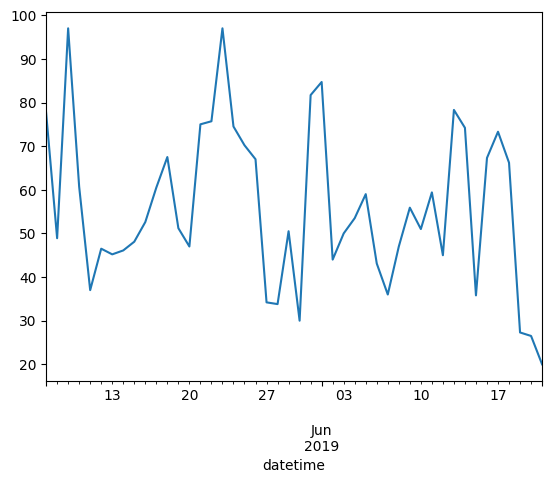

In [ ]:
import matplotlib
highs=air_quality["value"].resample('D').max() #: groups the time series data by day ('D' stands for daily frequency). The DataFrame must have a DatetimeIndex for resampling to work.
highs
%matplotlib inline
highs.plot()

# This code resamples the time series pollution "value" data to daily frequency, calculates the daily maximum, and plots the result inline for visual analysis of daily pollution peaks.

In [116]:
air_quality

,city,country,location,parameter,value,unit
datetime,,,,,,
2019-05-07 01:00:00+00:00,London,GB,London Westminster,no2,23.0,µg/m³
2019-05-07 01:00:00+00:00,Antwerpen,BE,BETR801,no2,50.5,µg/m³
2019-05-07 01:00:00+00:00,Paris,FR,FR04014,no2,25.0,µg/m³
2019-05-07 02:00:00+00:00,Paris,FR,FR04014,no2,27.7,µg/m³
2019-05-07 02:00:00+00:00,London,GB,London Westminster,no2,19.0,µg/m³
...,...,...,...,...,...,...
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³


In [120]:
# resampling weekly data 
air_quality.resample('W').max()


,city,country,location,parameter,value,unit
datetime,,,,,,
2019-05-12 00:00:00+00:00,Paris,GB,London Westminster,no2,97.0,µg/m³
2019-05-19 00:00:00+00:00,Paris,GB,London Westminster,no2,67.5,µg/m³
2019-05-26 00:00:00+00:00,Paris,GB,London Westminster,no2,97.0,µg/m³
2019-06-02 00:00:00+00:00,Paris,GB,London Westminster,no2,84.7,µg/m³
2019-06-09 00:00:00+00:00,Paris,GB,London Westminster,no2,59.0,µg/m³
2019-06-16 00:00:00+00:00,Paris,GB,London Westminster,no2,78.3,µg/m³
2019-06-23 00:00:00+00:00,Paris,GB,London Westminster,no2,73.3,µg/m³


In [ ]:
# use of agg method:
air_quality.resample('W').agg({"city":"max","value":"min"})

# In short, the expression groups your data by calendar weeks and for each week:
# Picks the alphabetically last city name found,
# Finds the minimum pollution "value" recorded during that week.

,city,value
datetime,,
2019-05-12 00:00:00+00:00,Paris,8.7
2019-05-19 00:00:00+00:00,Paris,0.0
2019-05-26 00:00:00+00:00,Paris,9.0
2019-06-02 00:00:00+00:00,Paris,0.0
2019-06-09 00:00:00+00:00,Paris,0.0
2019-06-16 00:00:00+00:00,Paris,0.0
2019-06-23 00:00:00+00:00,Paris,9.6


<Axes: xlabel='datetime'>

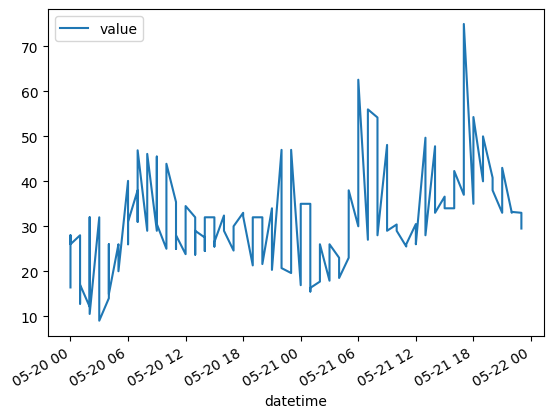

In [125]:
air_quality["2019-05-20":"2019-05-21"].plot()